In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec, plot_state_hinton

import warnings
warnings.filterwarnings('ignore')

sim = Aer.get_backend('aer_simulator')

## Bell State

In [16]:
def createBellStates(inp1, inp2):
    qc = QuantumCircuit(2)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)

    qc.save_statevector()
    # qobj = assemble(qc)
    result = sim.run(qc).result()
    state = result.get_statevector()

    return qc, state, result

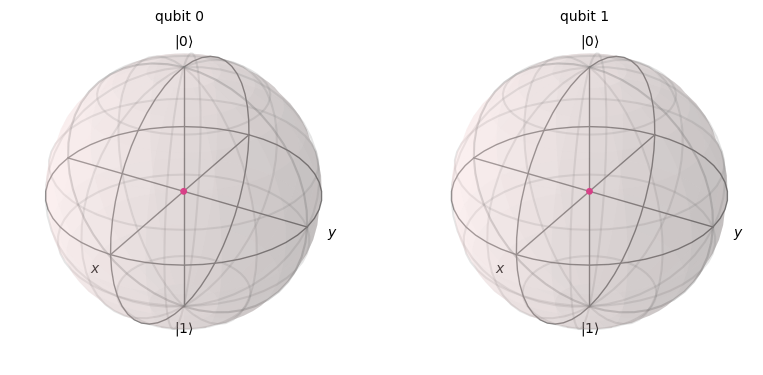

For inputs 0 0 Representation of Entangled States are:


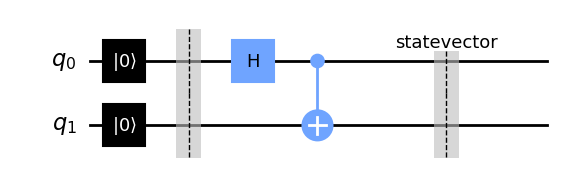

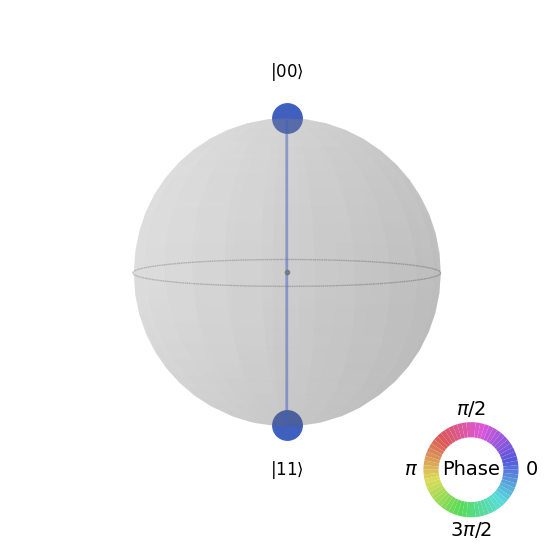

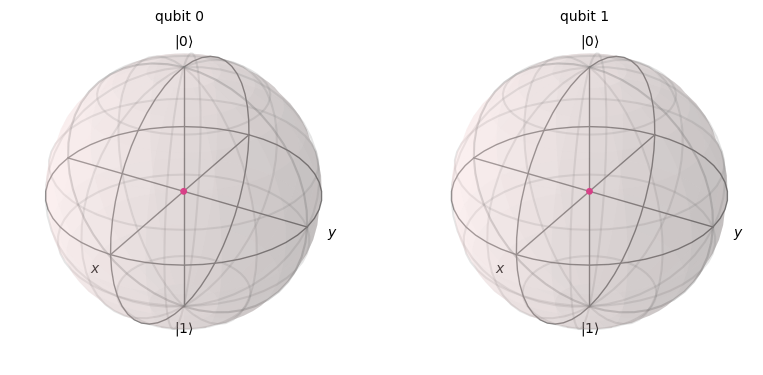

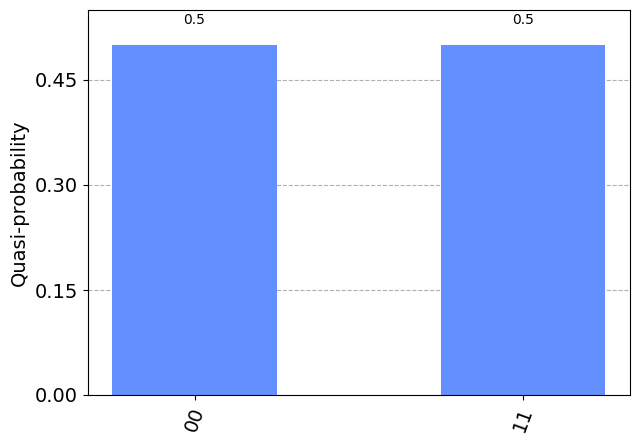

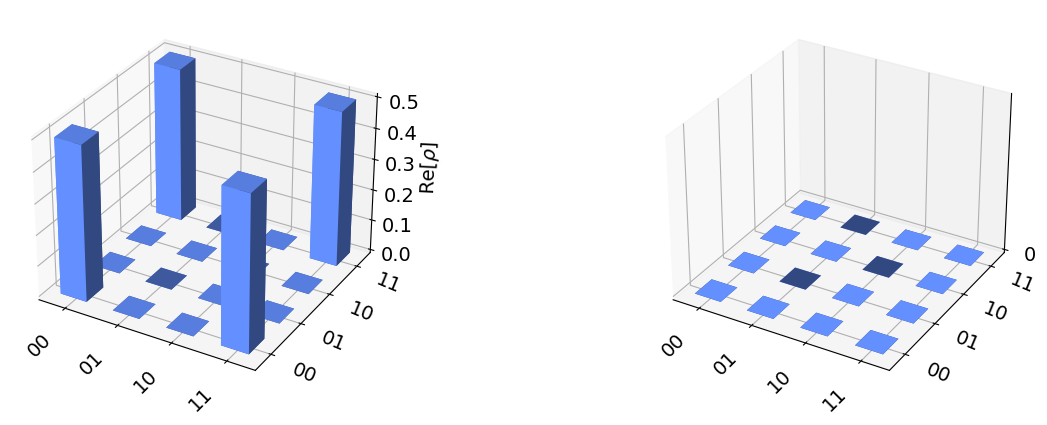

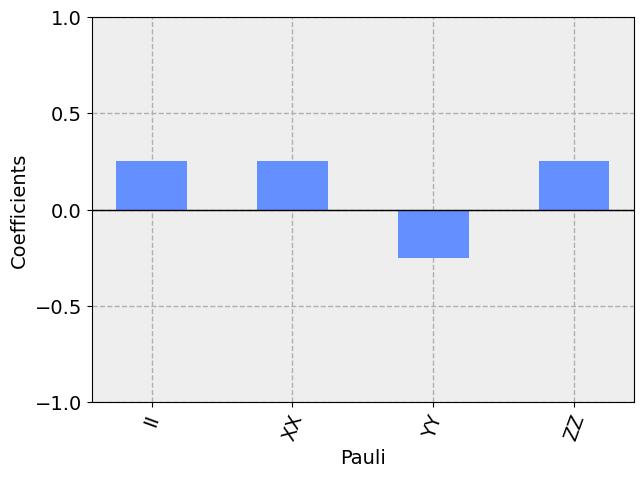

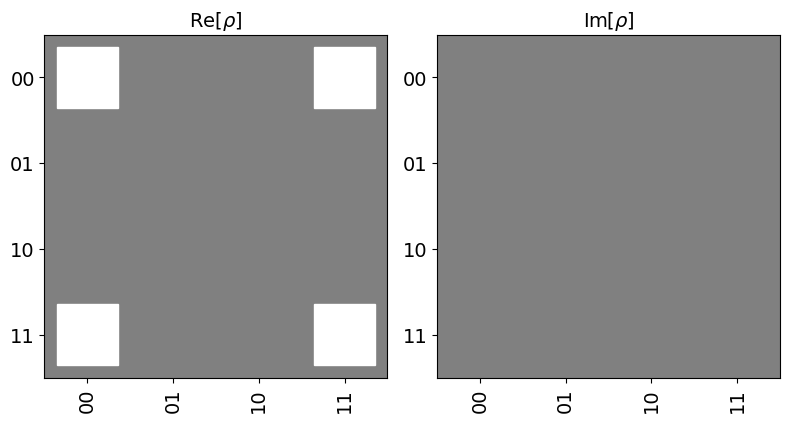



For inputs 0 1 Representation of Entangled States are:


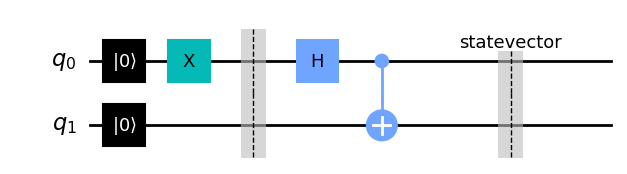

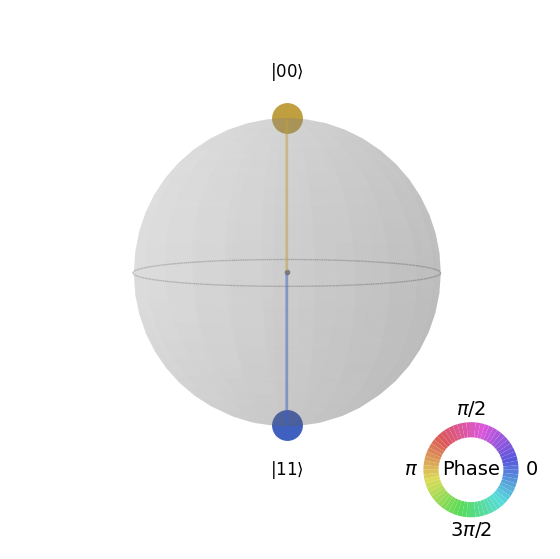

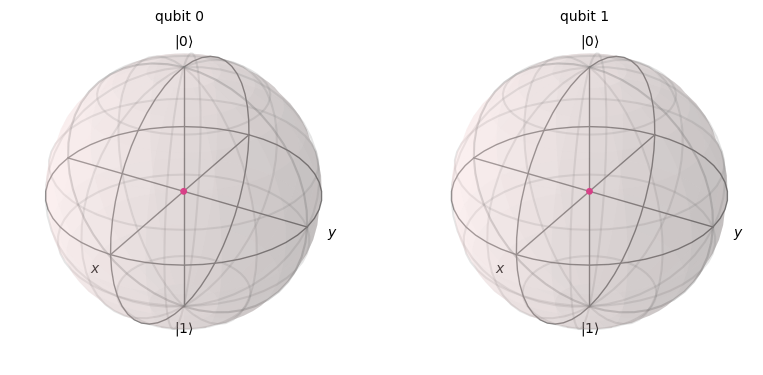

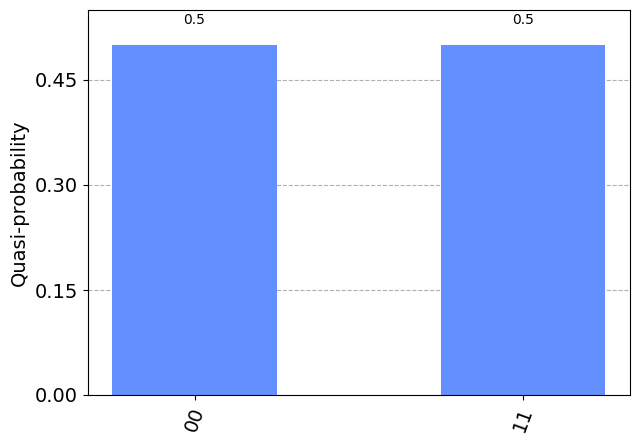

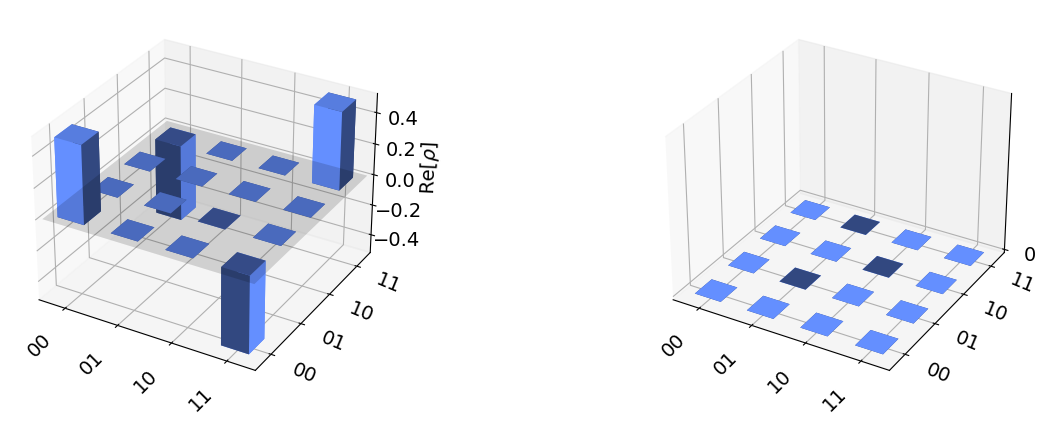

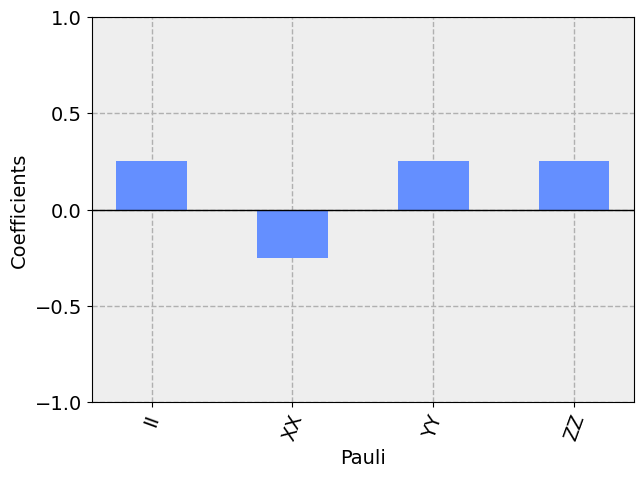

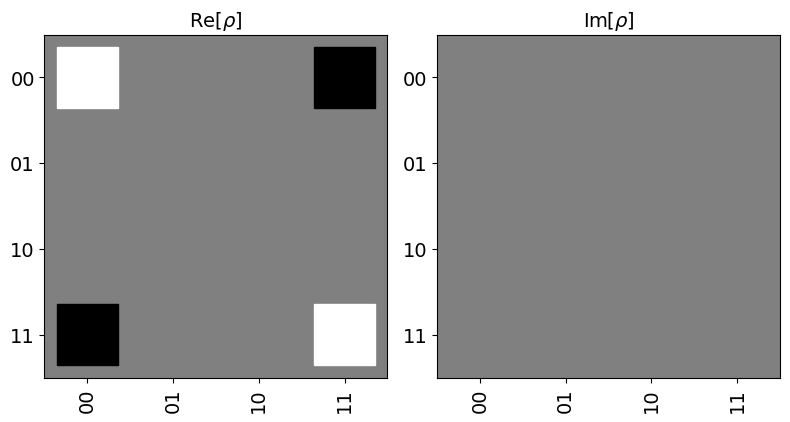



For inputs 1 0 Representation of Entangled States are:


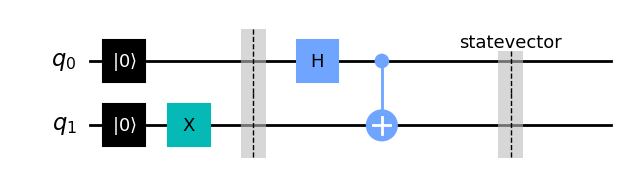

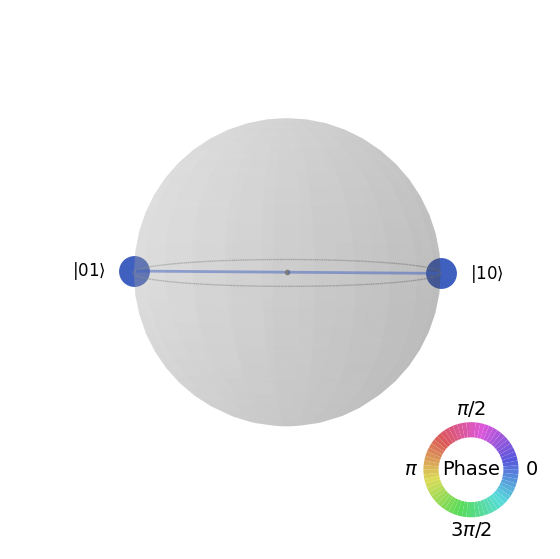

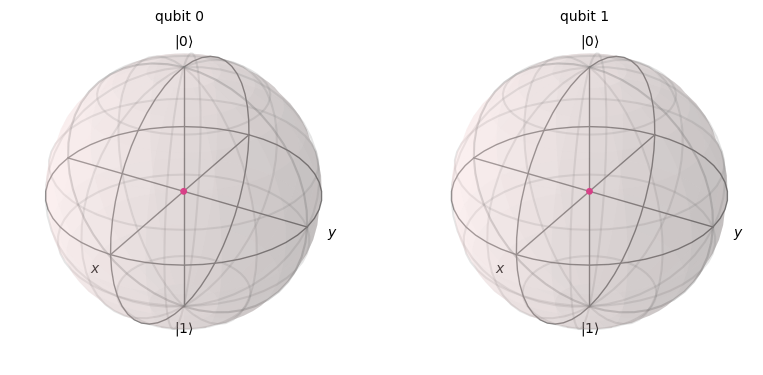

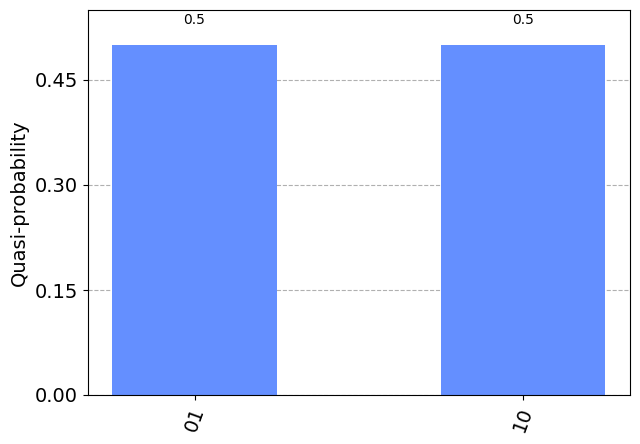

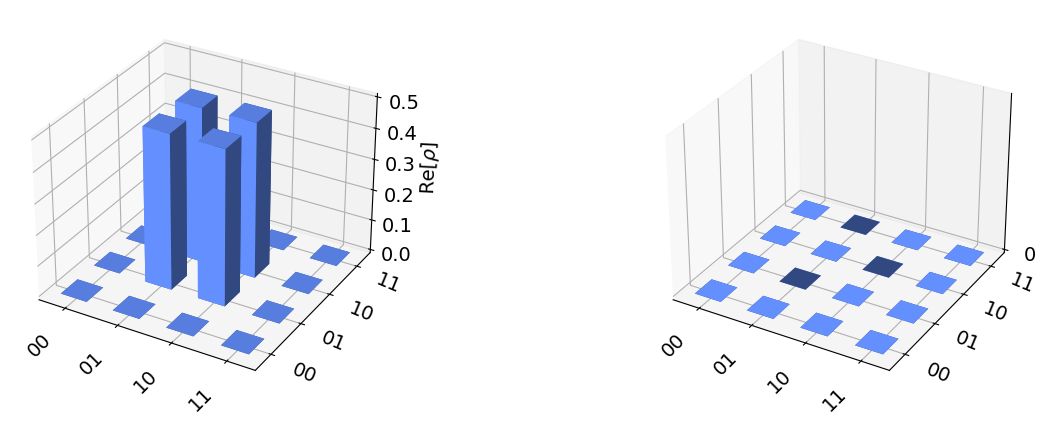

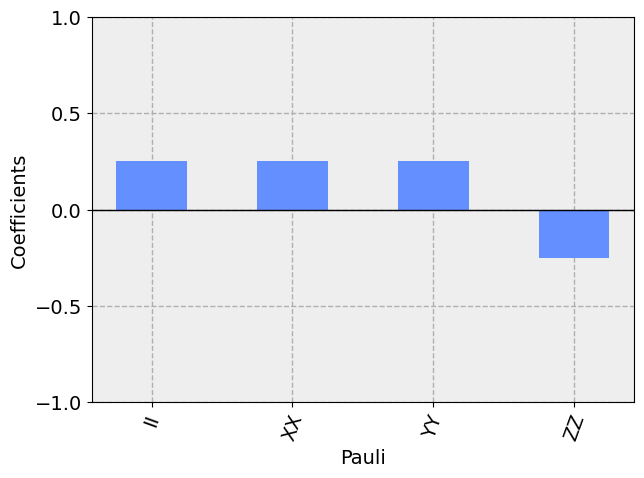

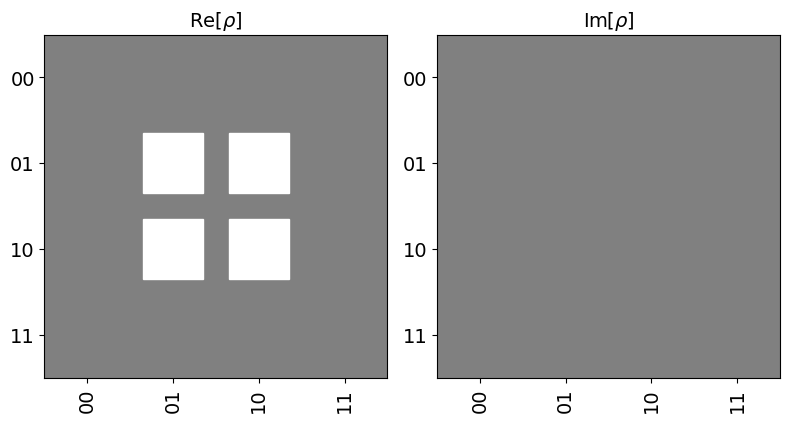



For inputs 1 1 Representation of Entangled States are:


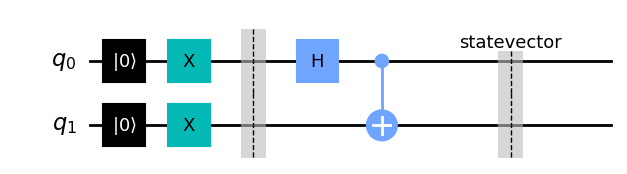

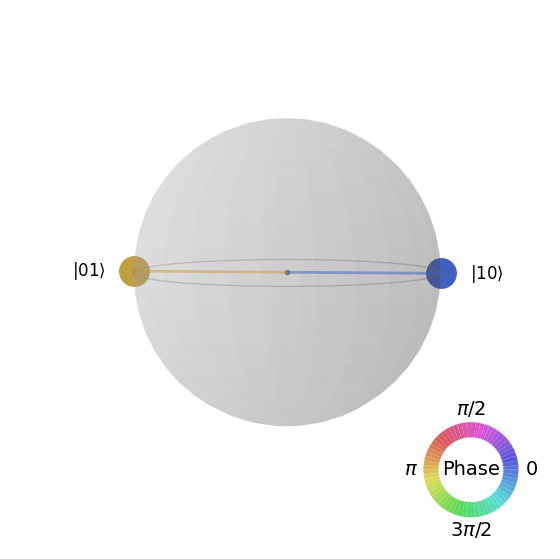

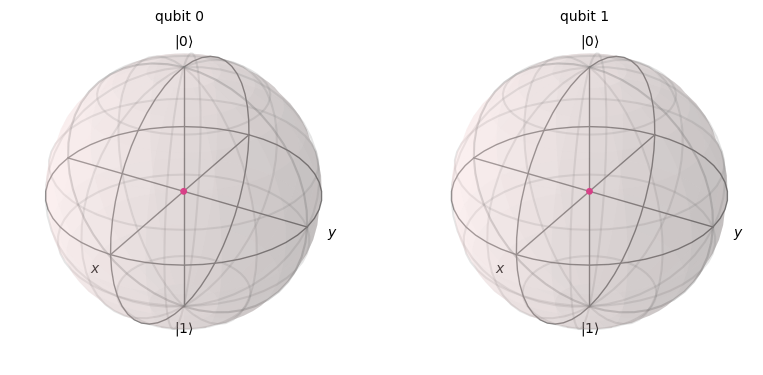

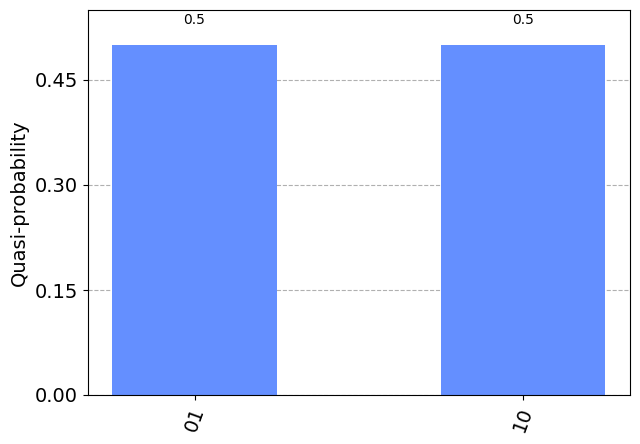

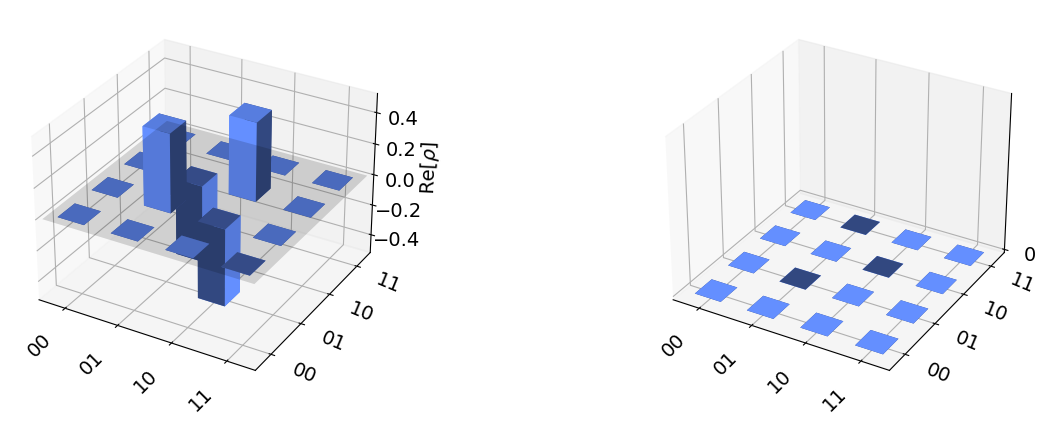

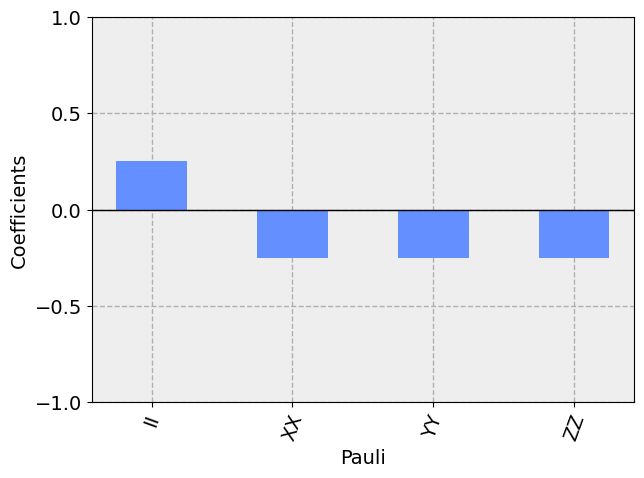

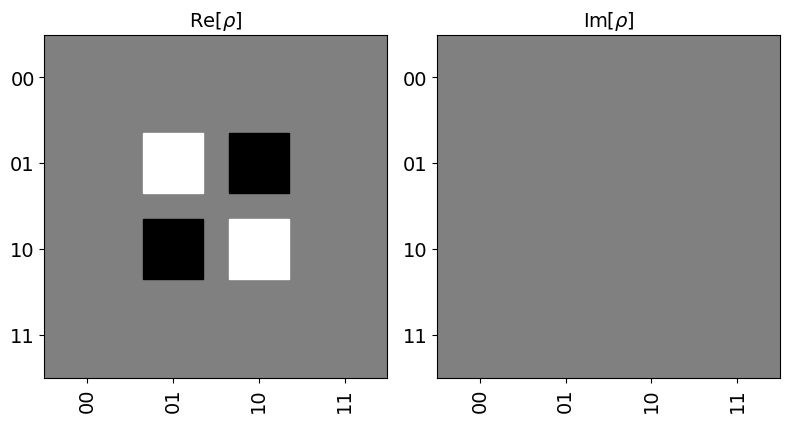

In [17]:

inp1 = 0
inp2 = 1

qc, state, result = createBellStates(inp1, inp2)

display(plot_bloch_multivector(state))

for inp2 in ['0', '1']:
    for inp1 in ['0', '1']:
        qc, state, result = createBellStates(inp1, inp2)
        
        print('For inputs',inp2,inp1,'Representation of Entangled States are:')
        
   
        display(qc.draw('mpl'))

        display(plot_state_qsphere(state))

        display(plot_bloch_multivector(state))

        display(plot_histogram(result.get_counts()))
        
        display(plot_state_city(state))

        display(plot_state_paulivec(state))

        display(plot_state_hinton(state))
        
        print('\n')

## 3-Qubit GHZ Circuit

In [18]:
def ghzCircuit(inp1, inp2, inp3):
    
    qc = QuantumCircuit(3)
    qc.reset(range(3))
    
    if inp1 == 1:
        qc.x(0)
    if inp2 == 1:
        qc.x(1)
    if inp3 == 1:
        qc.x(2)
    
    qc.barrier()
    
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    
    qc.save_statevector()
    # qobj = assemble(qc)
    result = sim.run(qc).result()
    state = result.get_statevector()

    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.



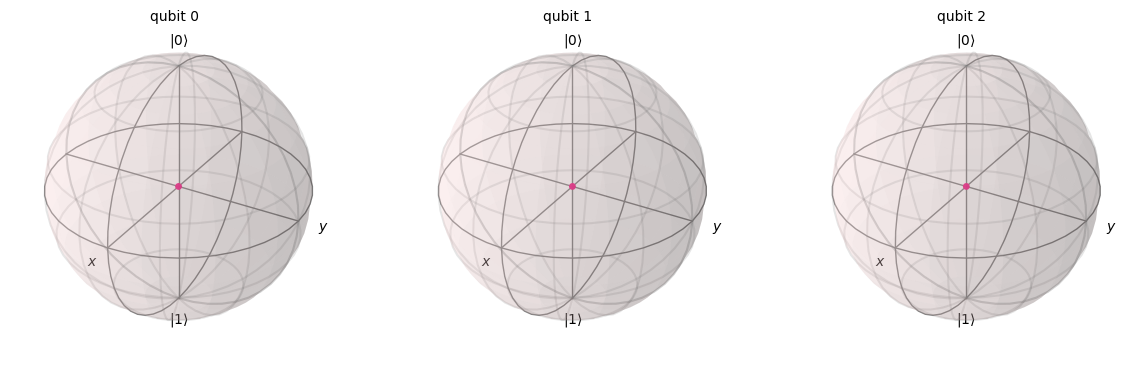

For inputs 0 0 0 Representation of GHZ States are:


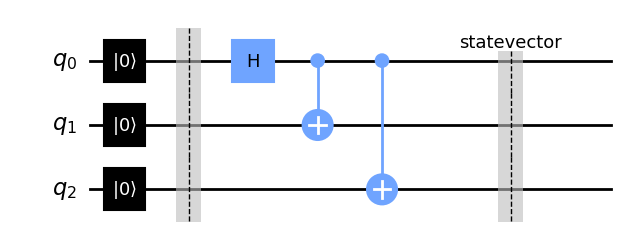

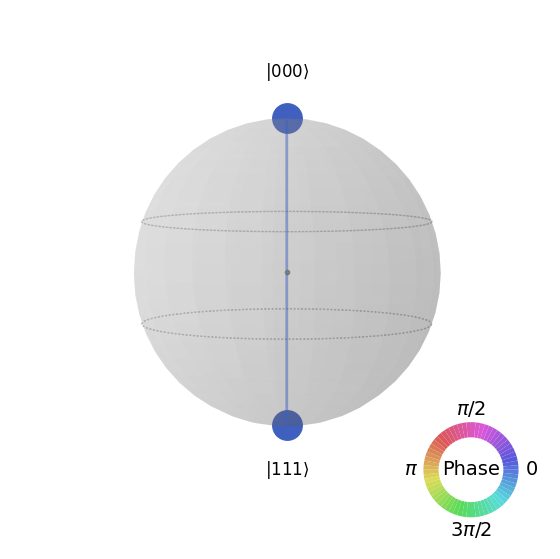

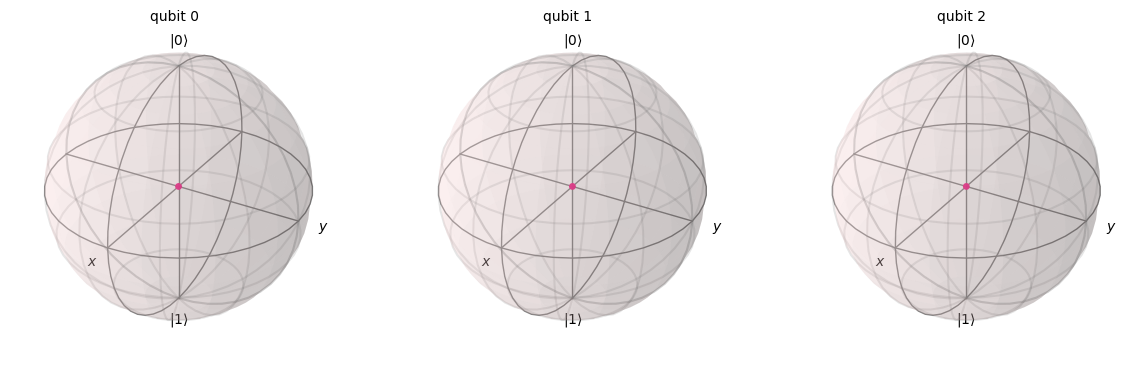

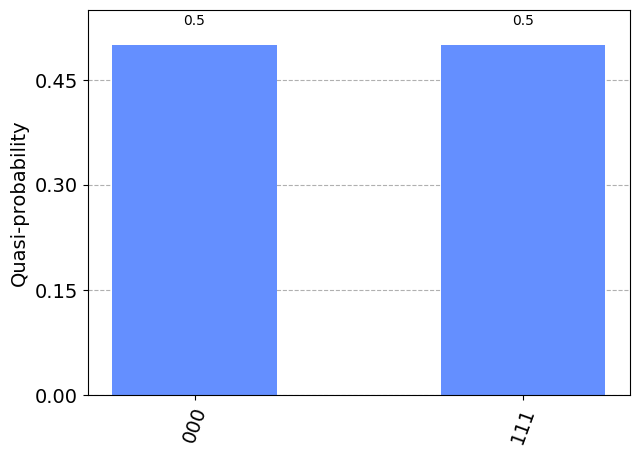

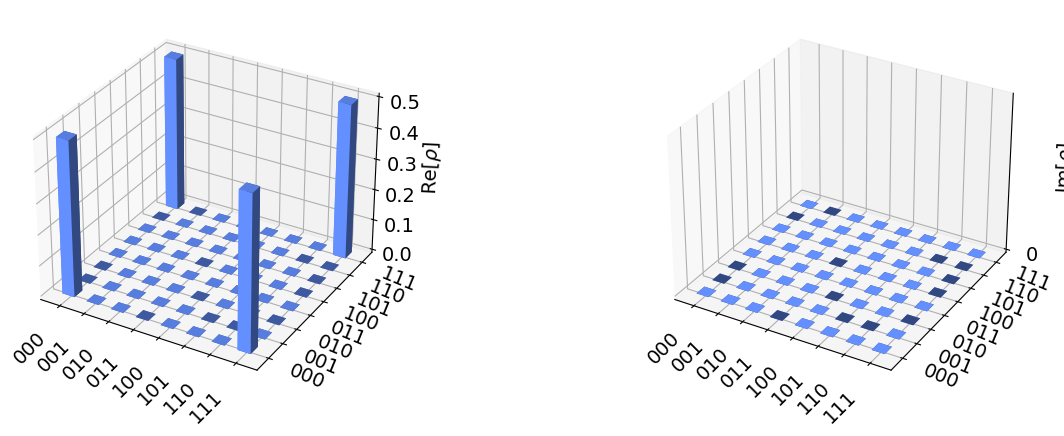

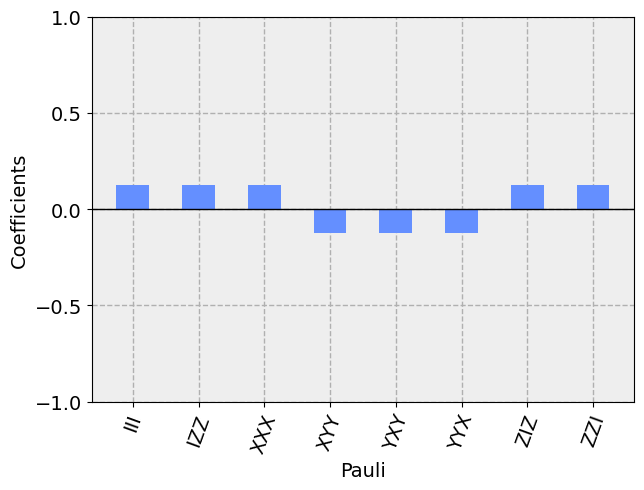

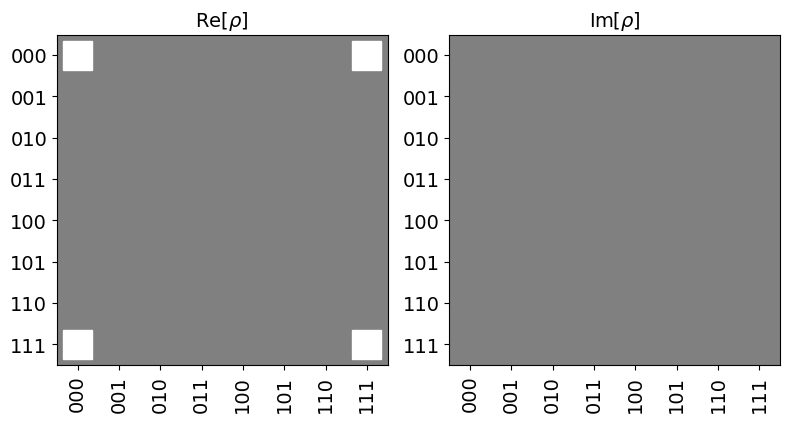



For inputs 0 0 1 Representation of GHZ States are:


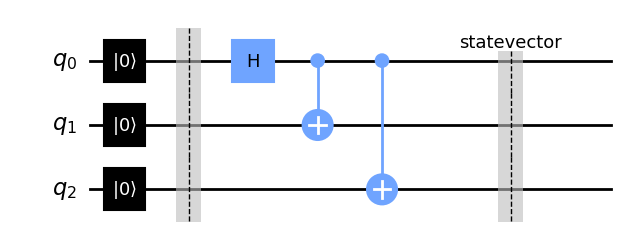

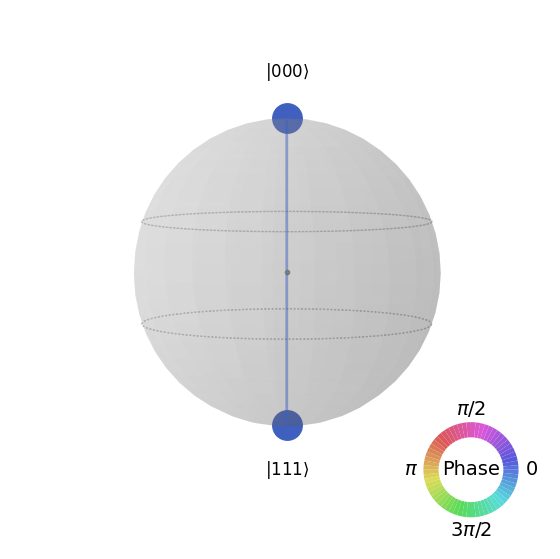

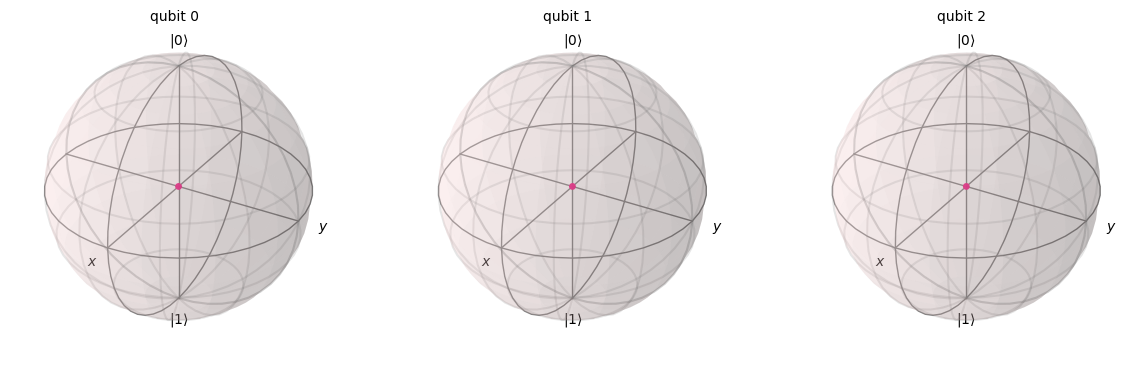

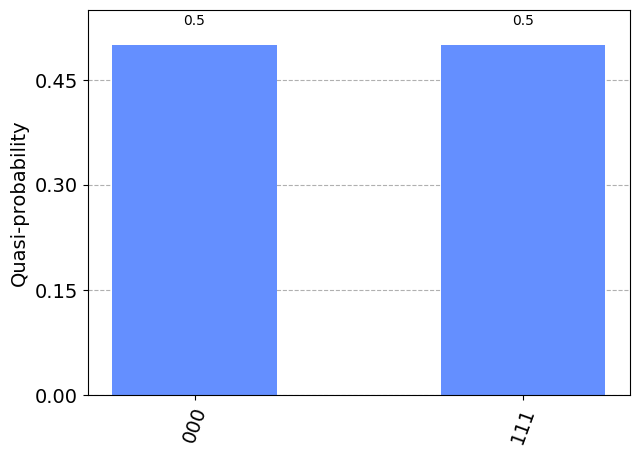

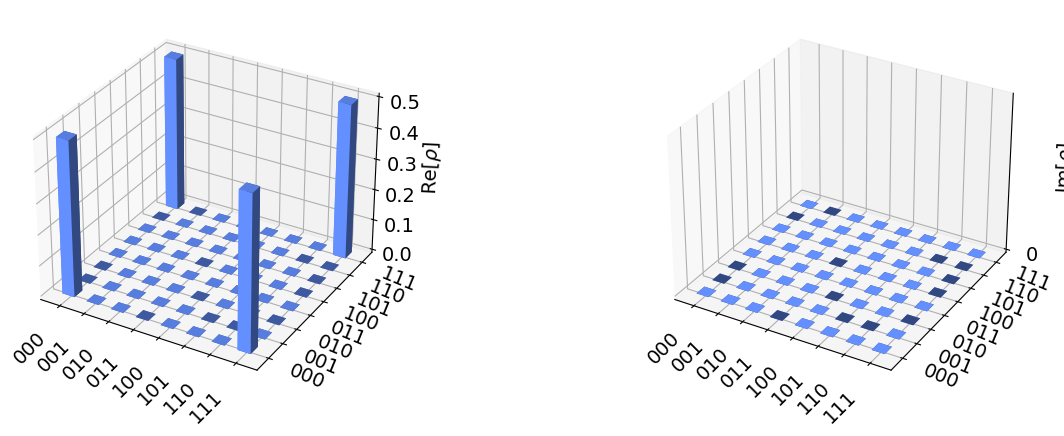

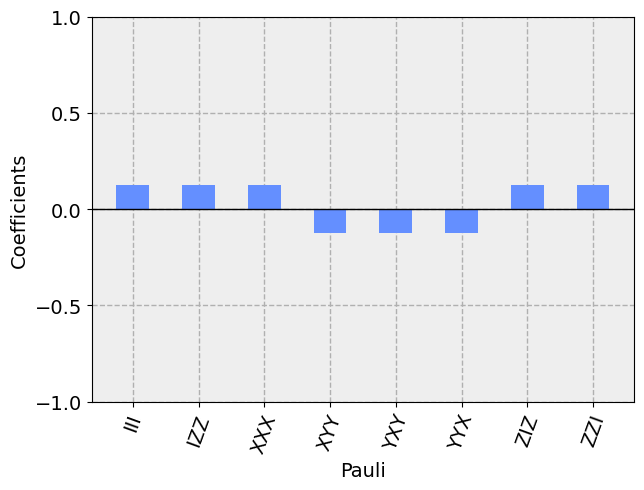

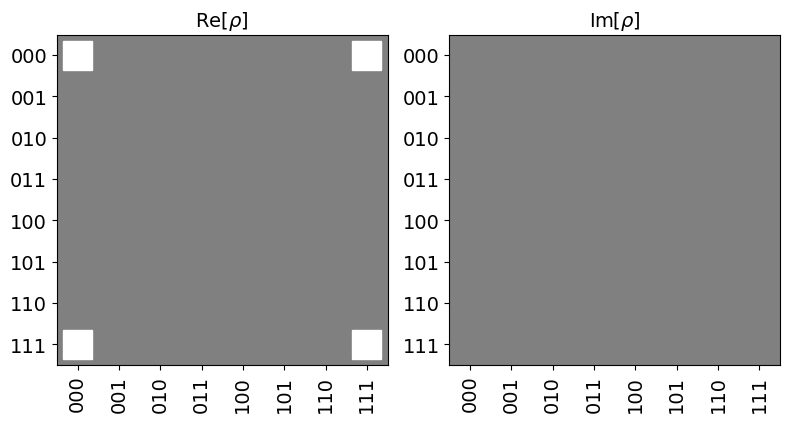



For inputs 0 1 0 Representation of GHZ States are:


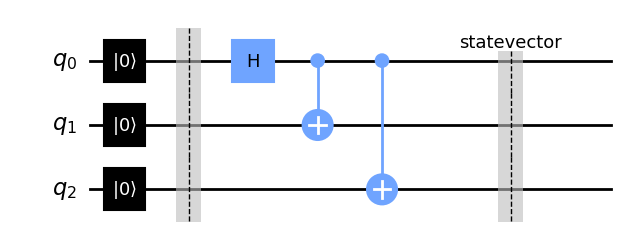

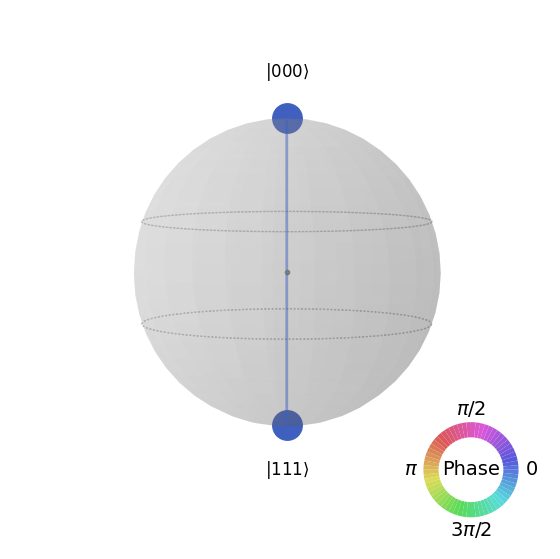

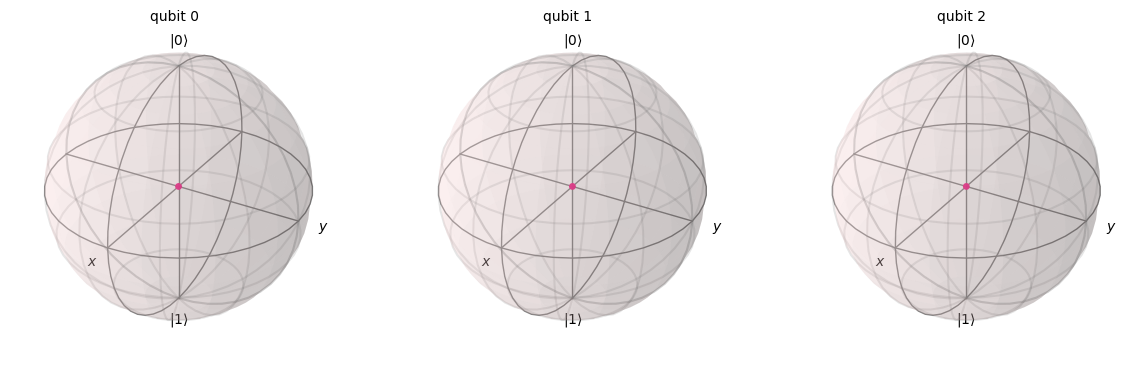

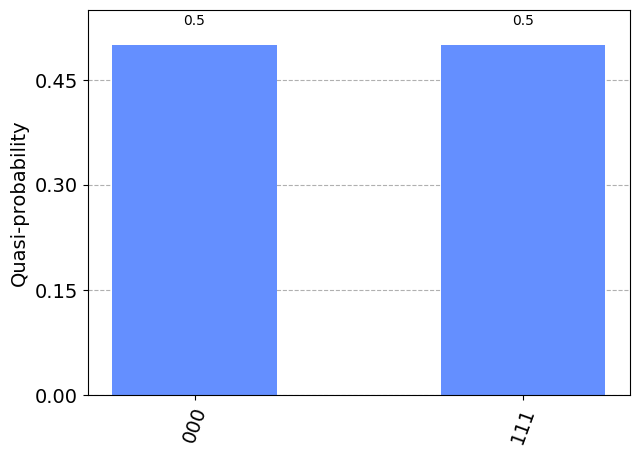

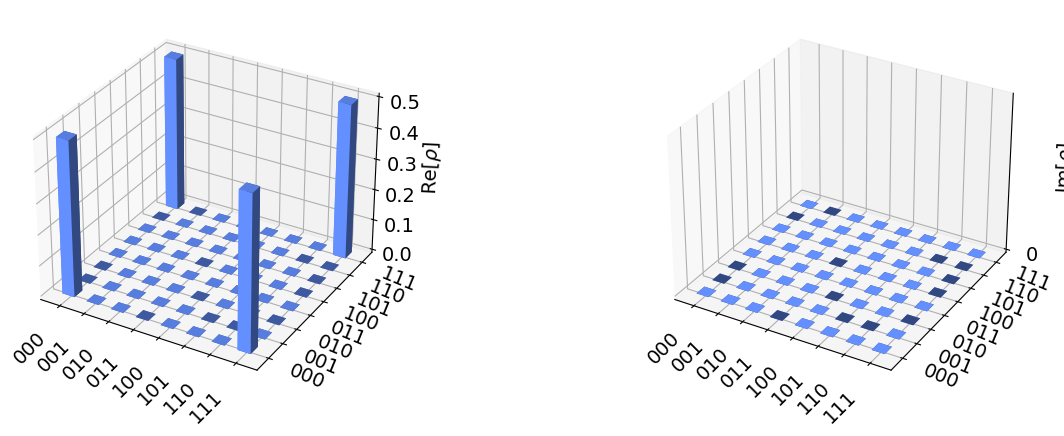

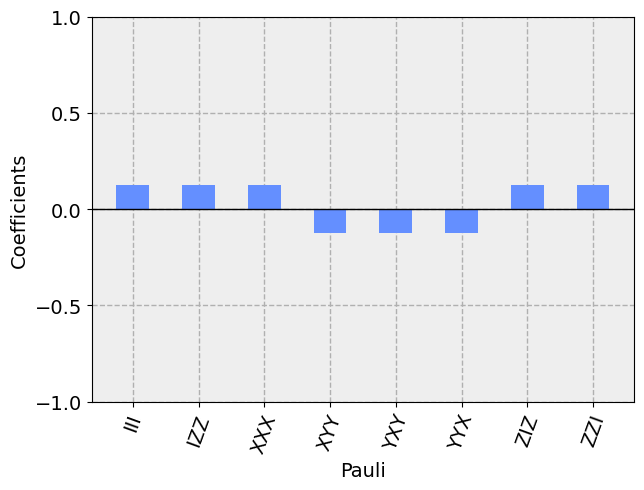

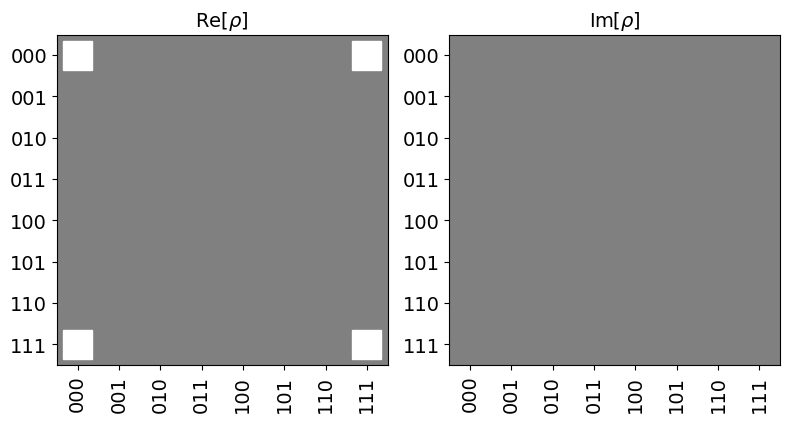



For inputs 0 1 1 Representation of GHZ States are:


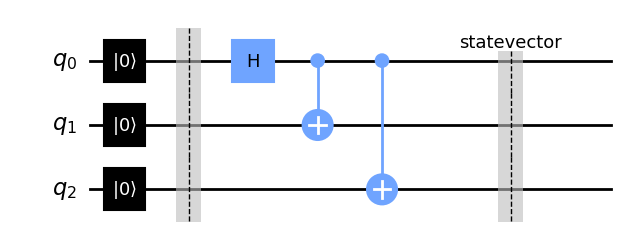

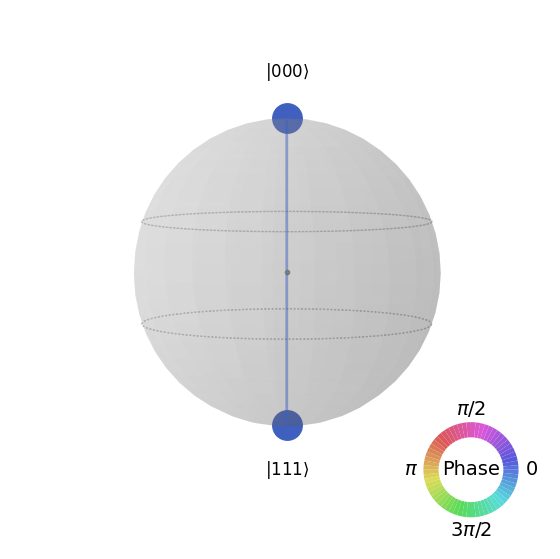

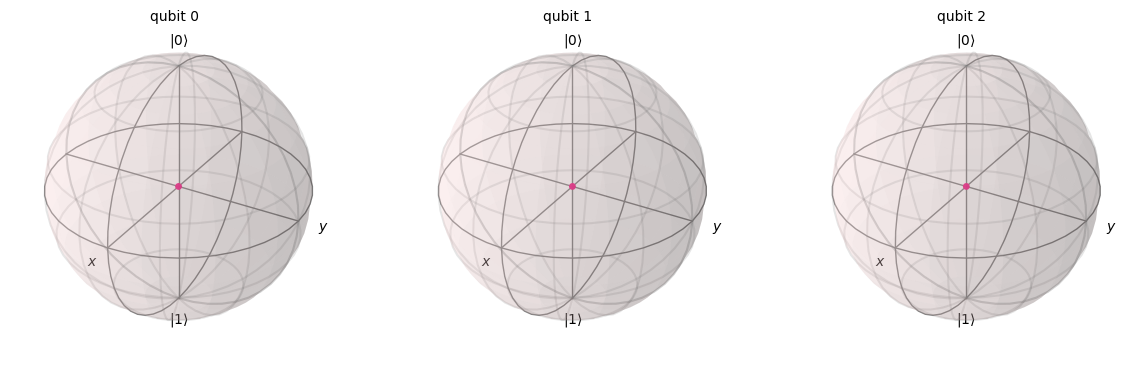

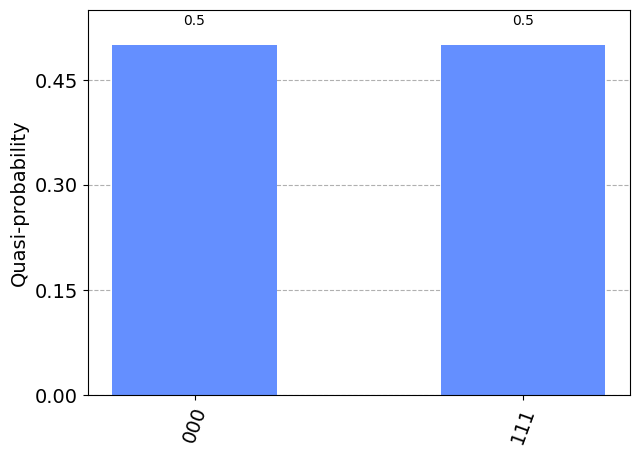

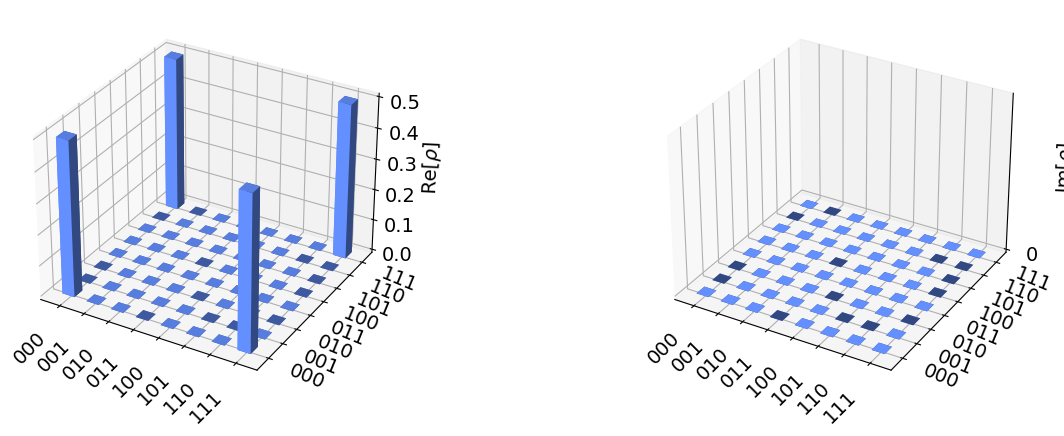

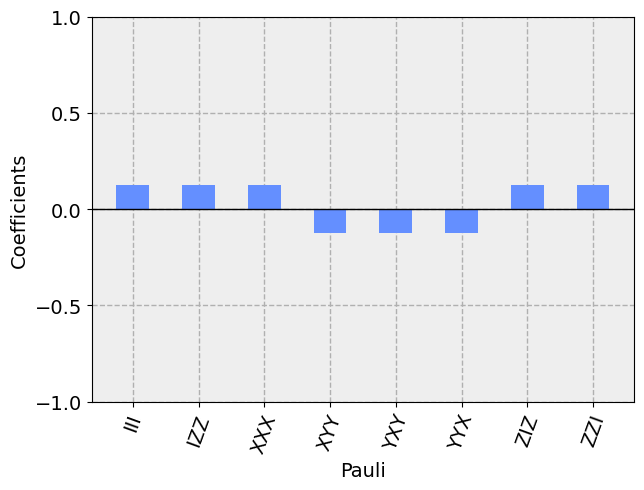

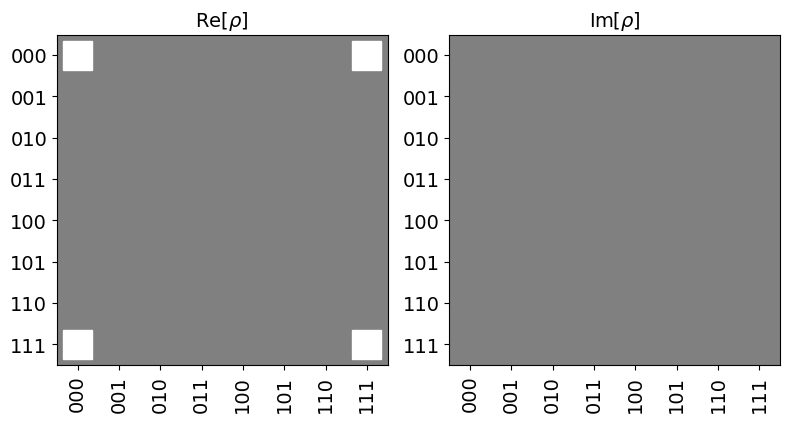



For inputs 1 0 0 Representation of GHZ States are:


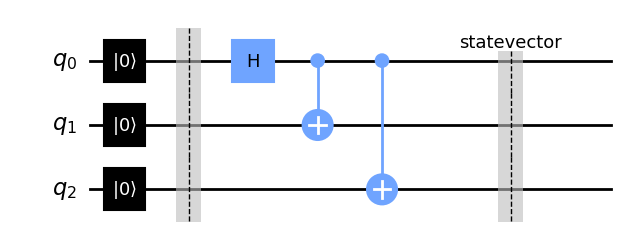

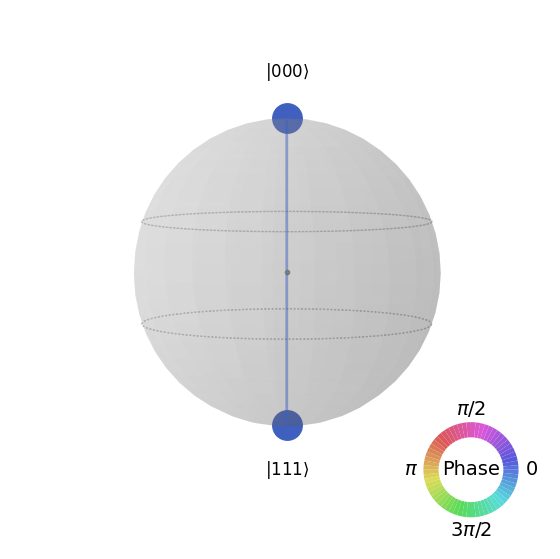

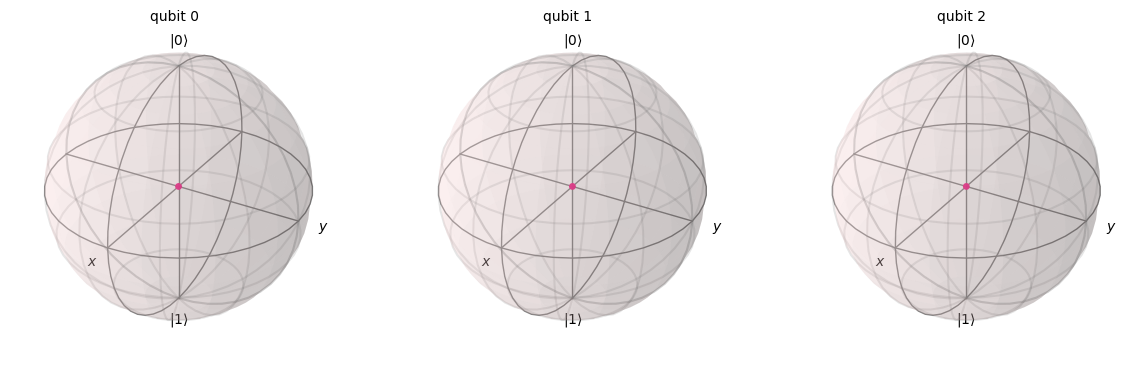

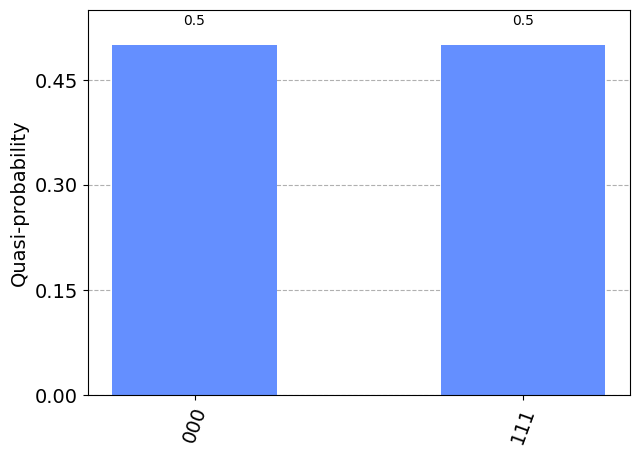

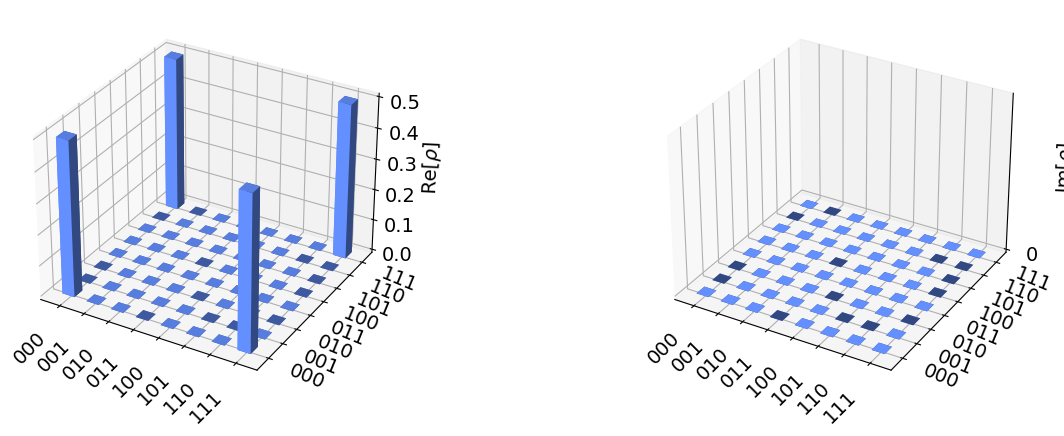

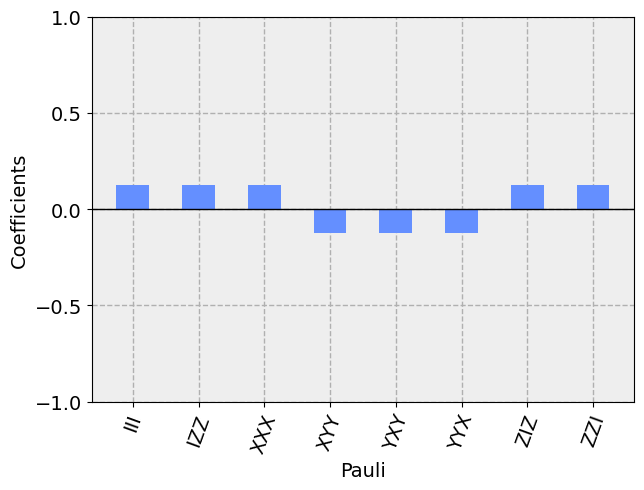

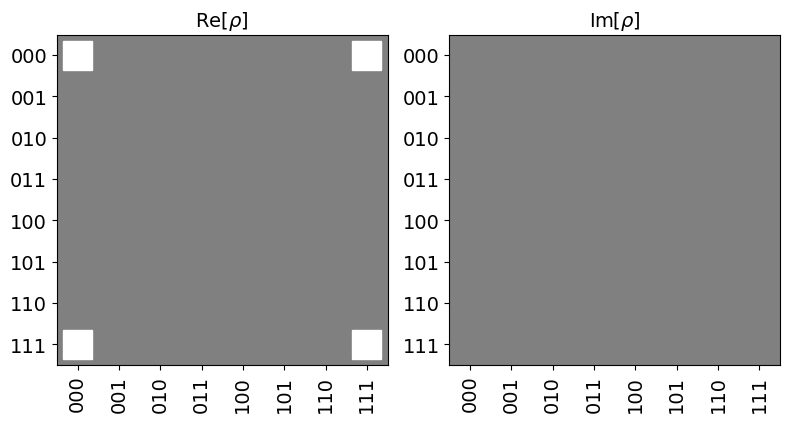



For inputs 1 0 1 Representation of GHZ States are:


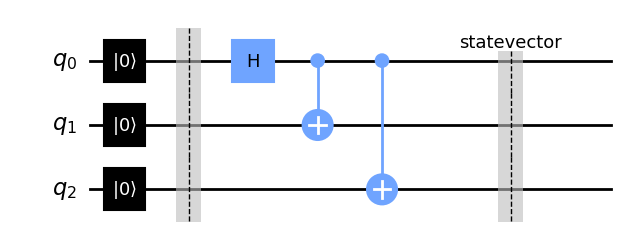

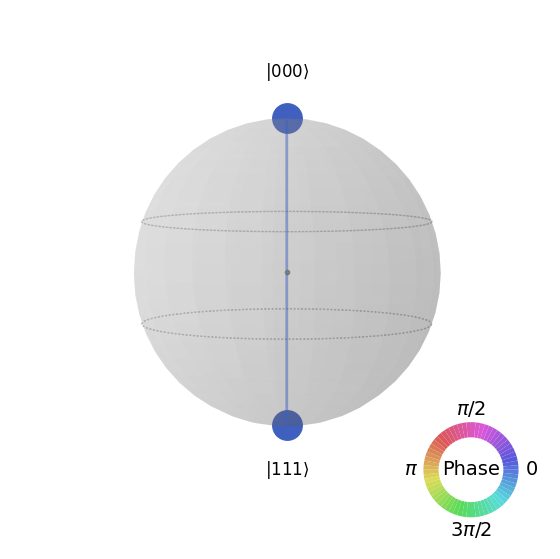

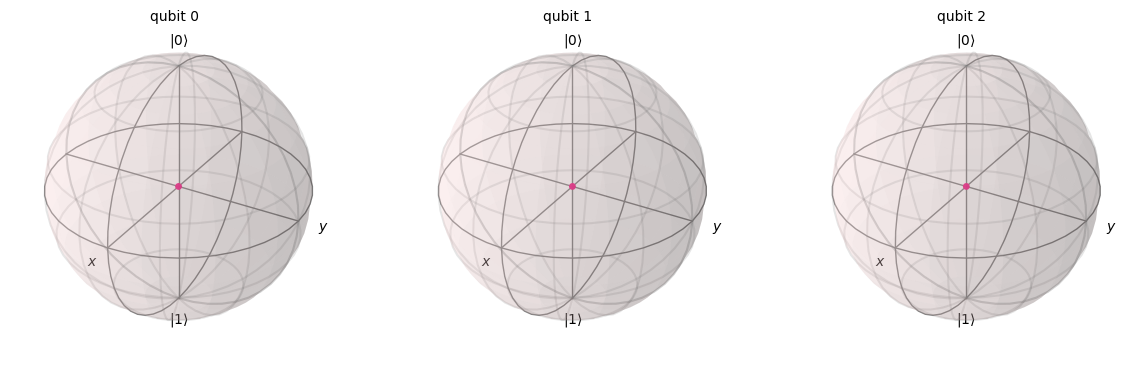

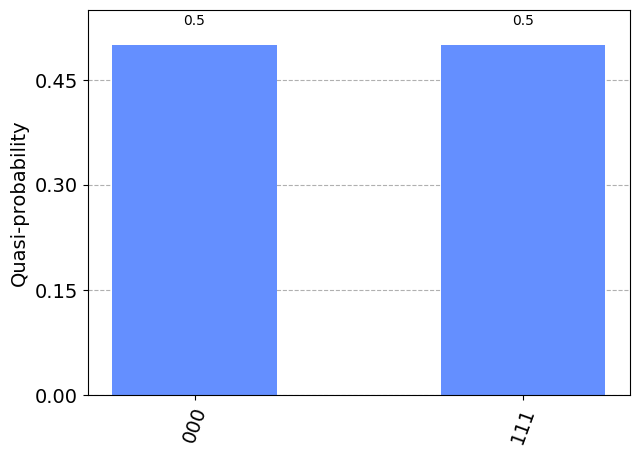

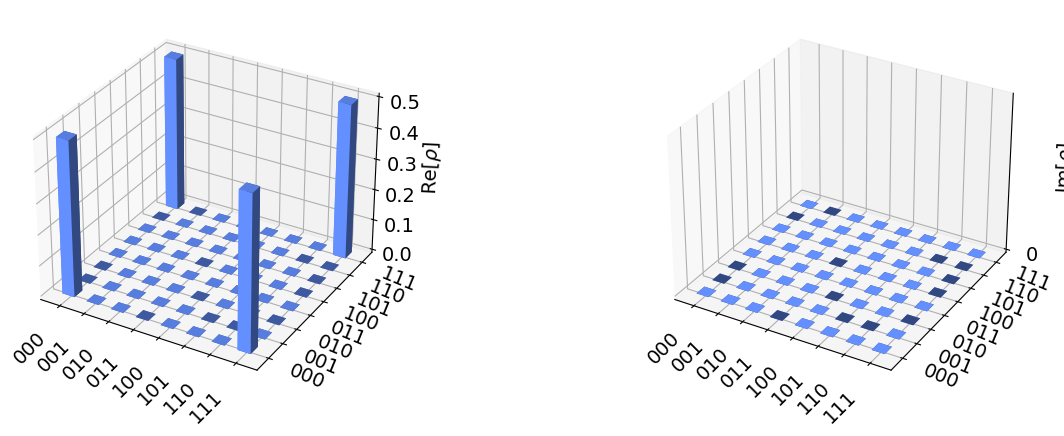

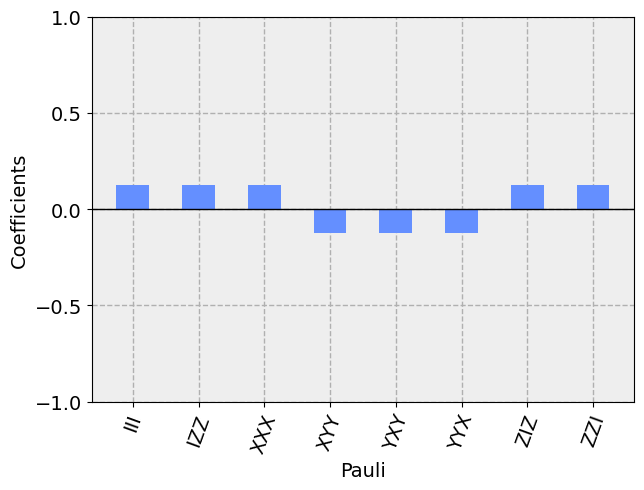

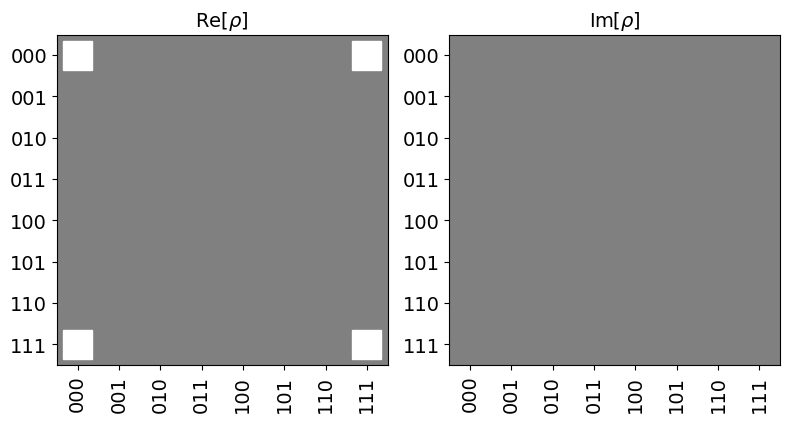



For inputs 1 1 0 Representation of GHZ States are:


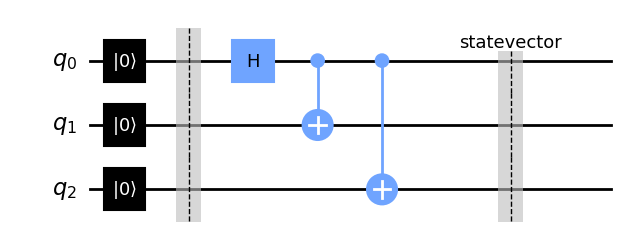

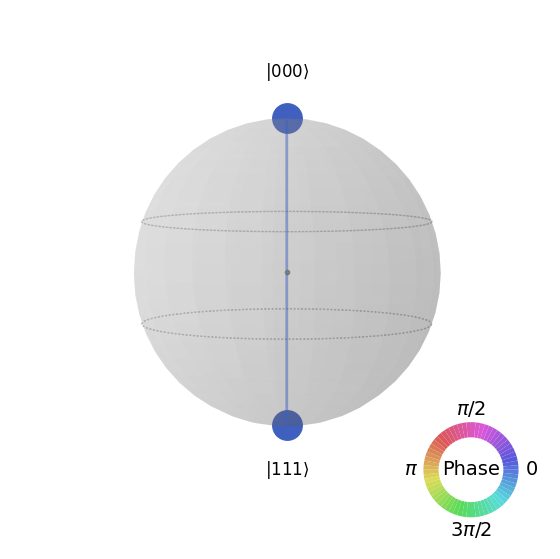

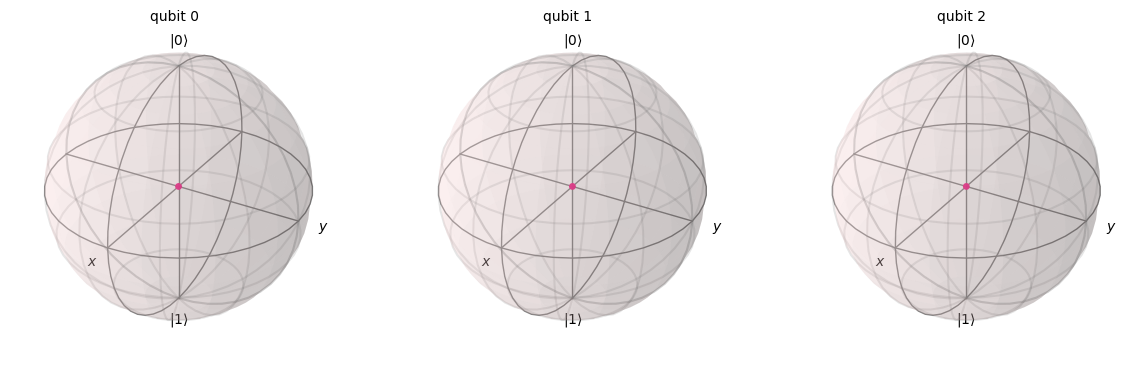

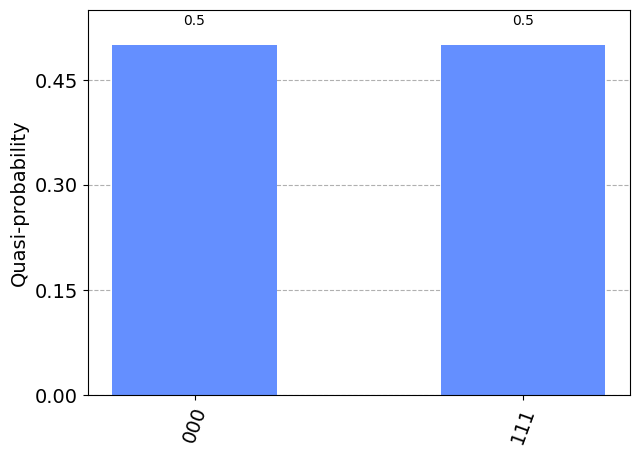

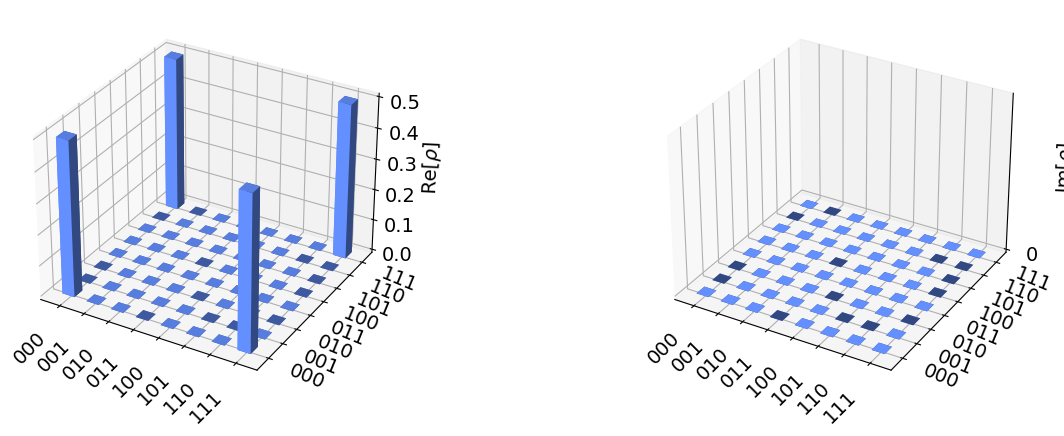

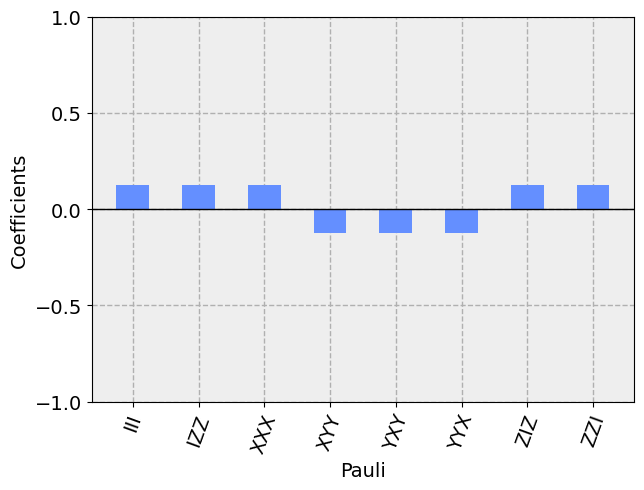

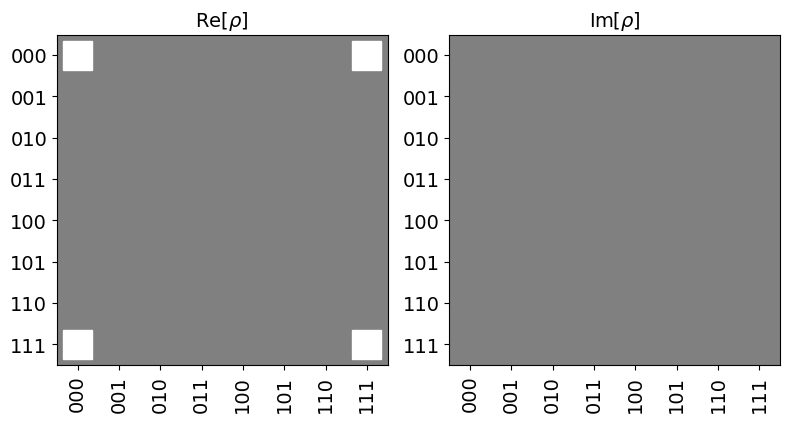



For inputs 1 1 1 Representation of GHZ States are:


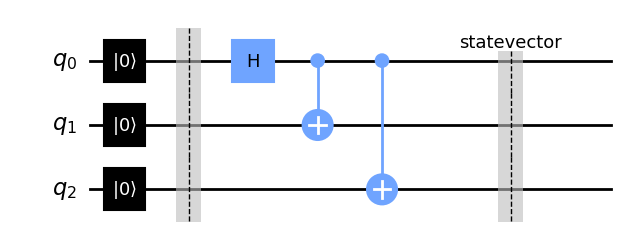

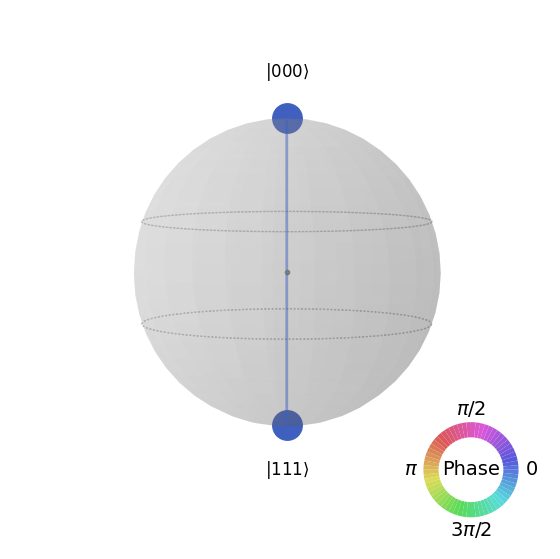

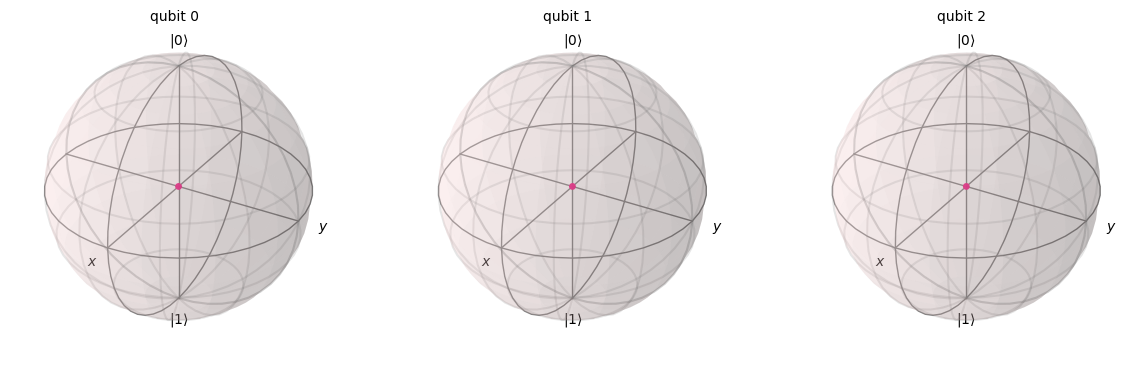

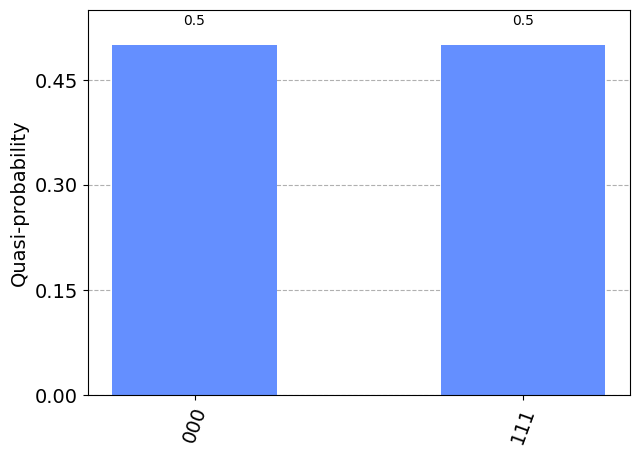

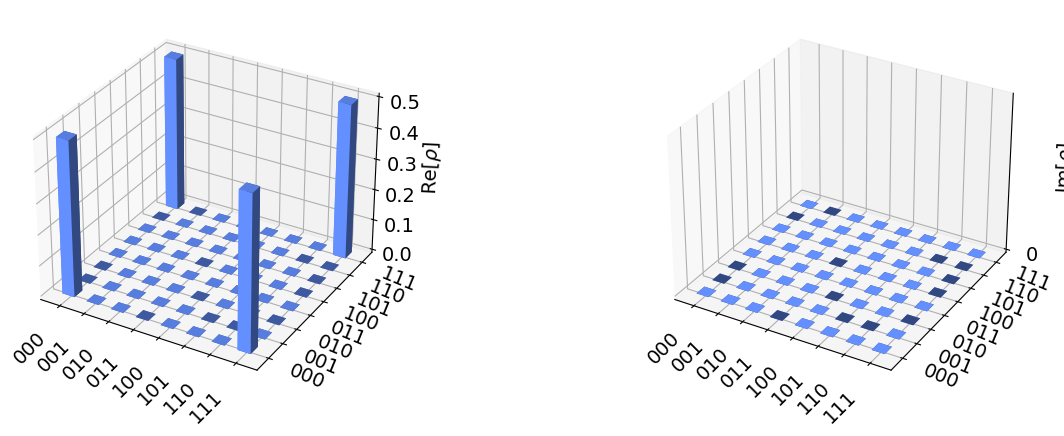

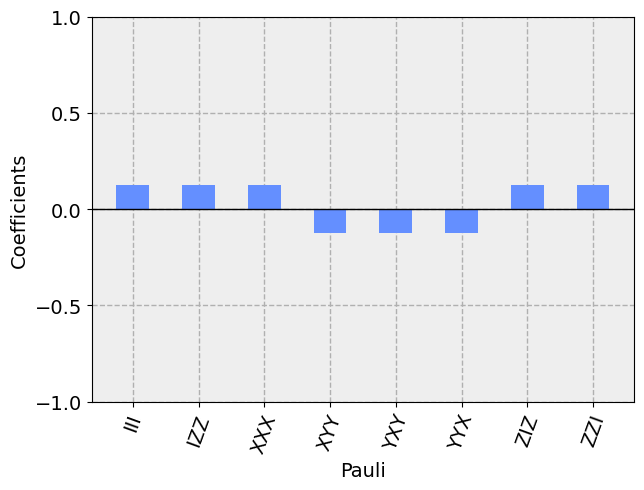

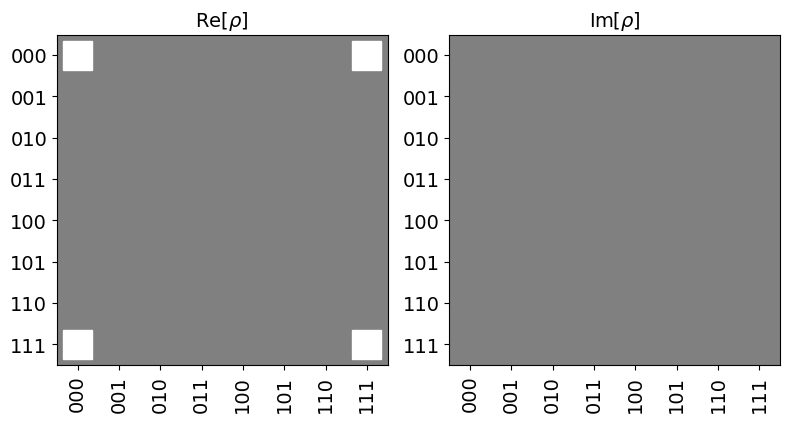

In [20]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')

inp1 = 0
inp2 = 1
inp3 = 1

qc, state, result = ghzCircuit(inp1, inp2, inp3)

display(plot_bloch_multivector(state))

for inp3 in ['0','1']:
    for inp2 in ['0','1']:
        for inp1 in ['0','1']:
            qc, state, result = ghzCircuit(inp1, inp2, inp3)

            print('For inputs',inp3,inp2,inp1,'Representation of GHZ States are:')


            display(qc.draw('mpl'))

            display(plot_state_qsphere(state))

            display(plot_bloch_multivector(state))

            display(plot_histogram(result.get_counts()))

            display(plot_state_city(state))

            display(plot_state_paulivec(state))

            display(plot_state_hinton(state))

            print('\n')

## 5-Qubit GHZ Circuit

In [21]:
def ghz5QCircuit(inp1, inp2, inp3, inp4, inp5):
    
    qc = QuantumCircuit(5)
    #qc.reset(range(5))
    
    if inp1 == 1:
        qc.x(0)
    if inp2 == 1:
        qc.x(1)
    if inp3 == 1:
        qc.x(2)
    if inp4 == 1:
        qc.x(3)
    if inp5 == 1:
        qc.x(4)
    
    qc.barrier()
    
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.cx(0,3)
    qc.cx(0,4)
    
    qc.save_statevector()
    result = sim.run(qc).result()
    state = result.get_statevector()

    return qc, state, result

For inputs 0 0 0 1 0 Representation of GHZ States are:


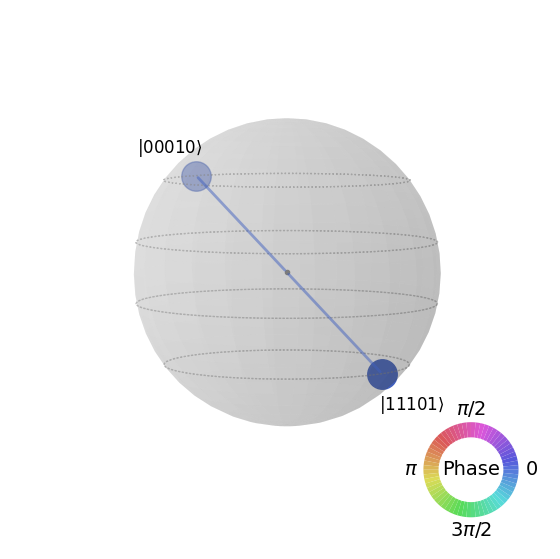

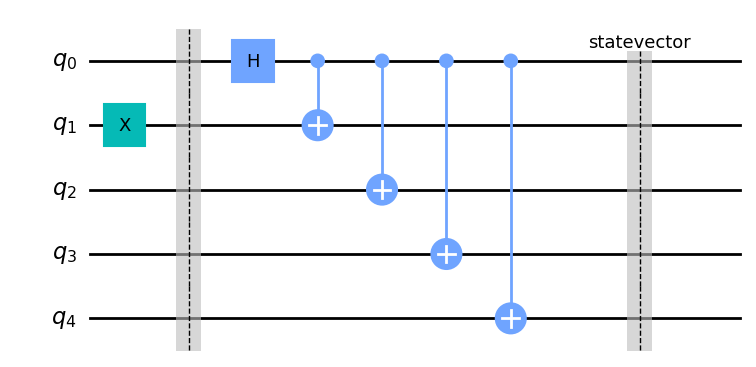

In [22]:
# Explore GHZ States for input 00010. Note: the input has been stated in little-endian format.
inp1 = 0
inp2 = 1
inp3 = 0
inp4 = 0
inp5 = 0

qc, state, result = ghz5QCircuit(inp1, inp2, inp3, inp4, inp5)

print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ States are:')
display(plot_state_qsphere(state))
print('\n')
qc.draw('mpl')

In [28]:
def create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5):
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr, cr)
    qc.reset(range(5))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    if inp3=='1':
        qc.x(1)
    if inp4=='1':
        qc.x(1)
    if inp5=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.cx(0,3)
    qc.cx(0,4)
    qc.barrier()
    qc.measure(qr, cr)
    qc.save_statevector()

    result = sim.run(qc).result()
    state = result.get_statevector()

    return qc, result,state

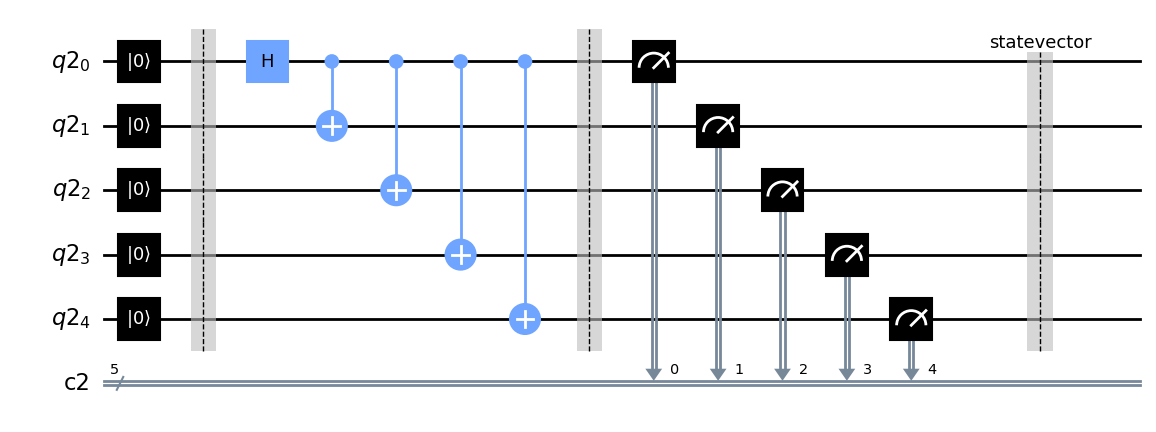

In [29]:
inp1 = 0
inp2 = 0
inp3 = 0
inp4 = 0
inp5 = 0

#first results
qc, first_result,state = create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5)
first_counts = first_result.get_counts()

# Draw the quantum circuit
display(qc.draw('mpl'))

In [12]:
a=[122]
a.append(1)
a.append(33)
a.sort()
res=a.reverse()
print(a)

[122, 33, 1]
